# PHDNDF Plotting And Analysis Stage

In [1]:
import os

import numpy as np
import pandas as pd

path = os.getcwd()
# find the string 'project' in the path, return index
index_project = path.find('project')
# slice the path from the index of 'project' to the end
project_path = path[:index_project+7]
# set the working directory
os.chdir(project_path)
print(f'Project path set to: {os.getcwd()}')

Project path set to: c:\Github\ode-biomarker-project


In [2]:
# Bring in CCLE data
from PathLoader import PathLoader
from DataLink import DataLink
path_loader = PathLoader('data_config.env', 'current_user.env')
data_link = DataLink(path_loader, 'data_codes.csv')

## Model Selection of FGFR4 Dynamic Feautres

In [22]:
# load in original ccle data
loading_code = 'generic-gdsc-1-FGFR_0939-LN_IC50-fgfr4_ccle_dynamic_features-true-Row'
# generic-gdsc-{number}-{drug_name}-{target_label}-{dataset_name}-{replace_index}-{row_index}
feature_data, label_data = data_link.get_data_using_code(loading_code)

## Feature Selection of the Dynamic Features

In [3]:
# load in original ccle data
loading_code = 'generic-gdsc-1-FGFR_0939-LN_IC50-fgfr4_ccle_dynamic_features-true-Row'
# generic-gdsc-{number}-{drug_name}-{target_label}-{dataset_name}-{replace_index}-{row_index}
feature_data, label_data = data_link.get_data_using_code(loading_code)

In [12]:
from toolkit import * 
selected_features, scores = f_regression_select(feature_data, label_data, 10)

invalid value encountered in sqrt


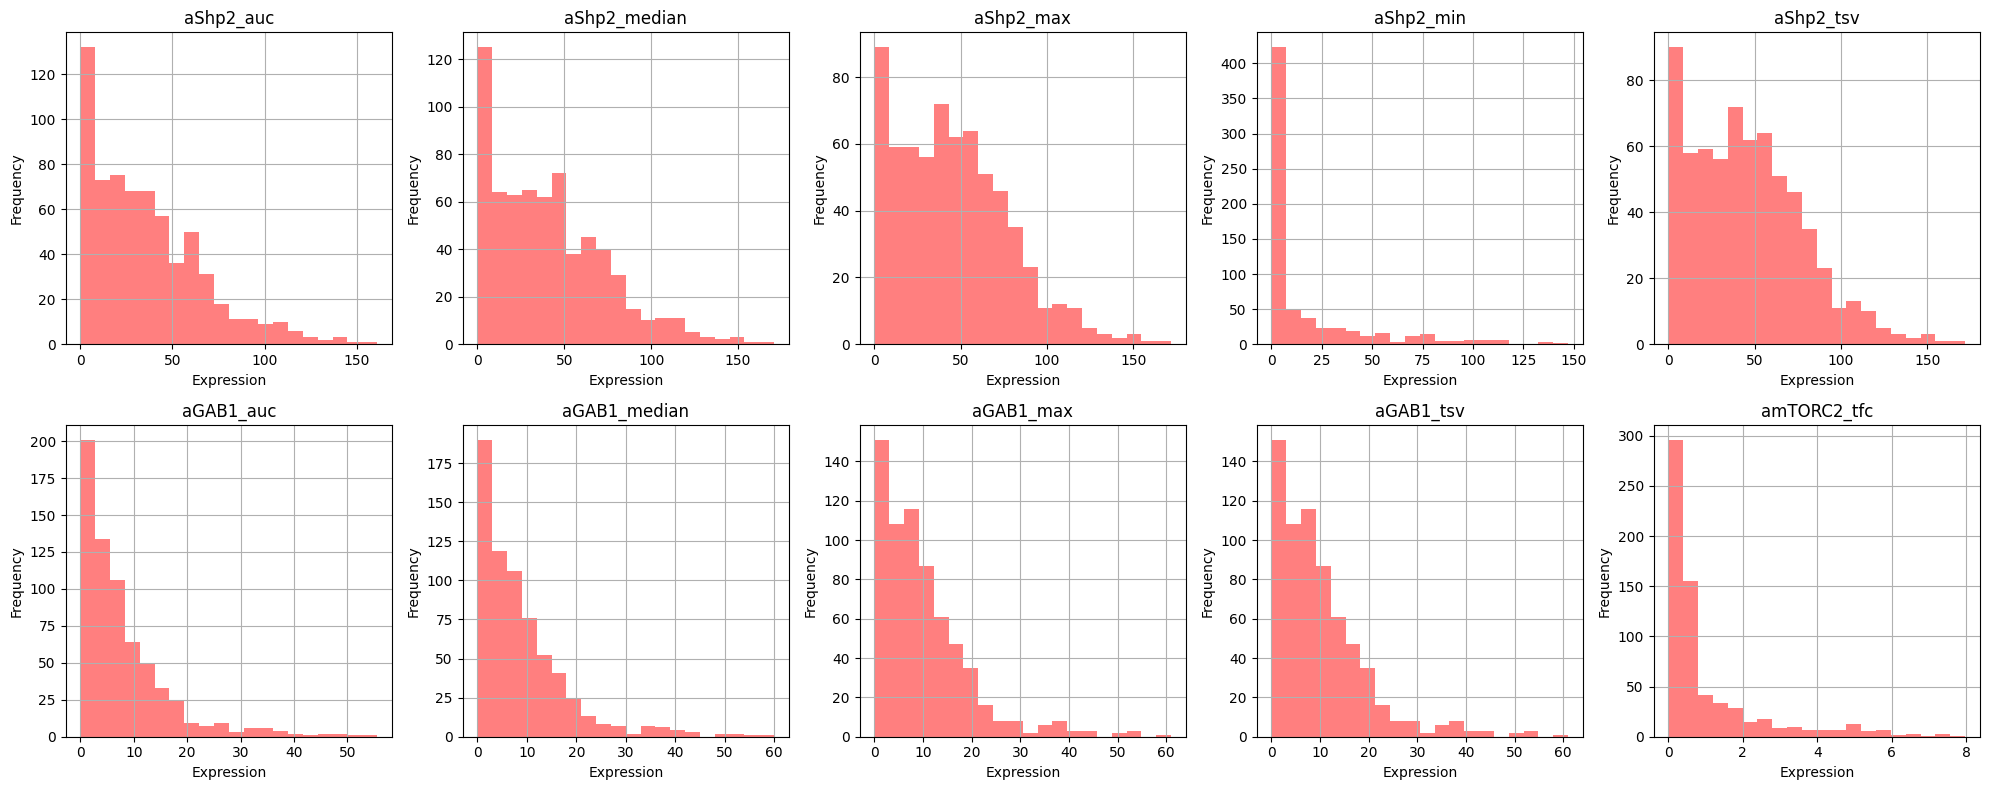

In [21]:
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.flatten()
for i, col in enumerate(selected_features):
    feature_data[col].plot(kind='hist', bins=20, ax=axes[i], color='red', alpha=0.5)
    axes[i].grid()
    axes[i].set_title(col)
    axes[i].set_xlabel('Expression')
plt.tight_layout()

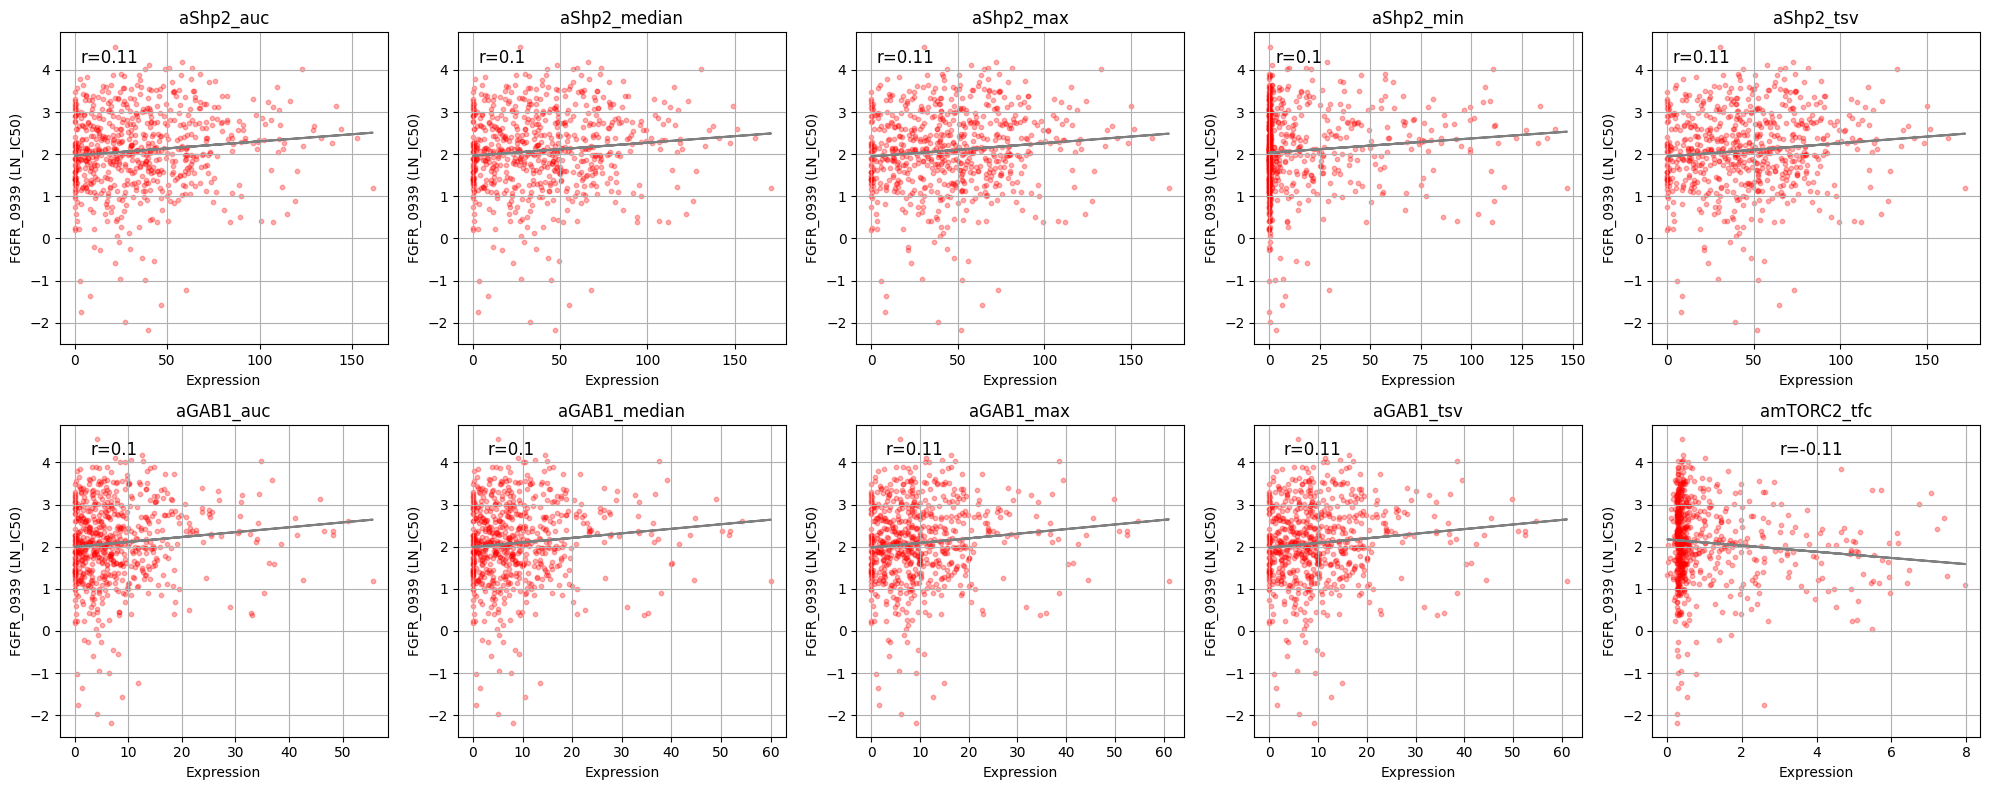

In [20]:
import Visualisation as viz
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.flatten()
for i, col in enumerate(selected_features):
    # plot correlation
    X = feature_data[col]
    Y = label_data
    axes[i].scatter(X, Y, color='red', alpha=0.3, s=10)
    m, b = np.polyfit(X, Y, 1)
    axes[i].plot(X, m*X + b, color='grey')
    corr = str(round(np.corrcoef(X, Y)[0, 1], 2))

    # insert annotations
    axes[i].grid()
    axes[i].text(3, 4.5, f'r={corr}', fontsize=12, verticalalignment='top')
    axes[i].set_title(f'{col}')
    axes[i].set_xlabel('Expression')
    axes[i].set_ylabel('FGFR_0939 (LN_IC50)')

plt.tight_layout()
plt.show()

## Bring in FGFR4 Model Individualised Initial Conditions

In [3]:
# Bring in CCLE data
from PathLoader import PathLoader
from DataLink import DataLink
path_loader = PathLoader('data_config.env', 'current_user.env')
data_link = DataLink(path_loader, 'data_codes.csv')

In [5]:
import pandas as pd 

initial_conditions = pd.read_csv(f'{path_loader.get_data_path()}data/results/fgfr4_model_initial_conditions/initial_conditions.csv')

In [6]:
# INPUT Data code for match rules table (csv file)
INPUT_DATA_CODE_MATCH_RULES = 'fgfr4_model_ccle_match_rules'
data_link.load_data_code(INPUT_DATA_CODE_MATCH_RULES, verbose=True)
match_rules_df = data_link.data_code_database[INPUT_DATA_CODE_MATCH_RULES]

Data code fgfr4_model_ccle_match_rules loaded at data/ode-models/FGFR4_Model_SY/fgfr4_model_ccle_reference.csv with index position 0. Enforced raw loading: True


In [23]:
match_rules_df.loc[match_rules_df['specie'] == 'IGFR']['initial_value'][0]

7.58

In [36]:
for col in initial_conditions.columns[1:]:
    print(match_rules_df.loc[match_rules_df['specie'] == col]['initial_value'].values[0])

7.58
0.0
962.77
0.0
680.21
0.0
13.04
0.0
2.72
0.0
5000.0
0.0
20.54
0.0
6436.64
0.0
653.74
0.0
39.24
0.0
13.17
0.0
41.1
0.0
3.7
0.0
270.39
0.0
1813.21
0.0
27.49
0.0
1997.8
0.0
2054.4
0.0
20.03
0.0
4.26
0.0
0.0
0.0
0.0
0.0
0.0
5.43
0.0
1025.0
1025.0
13.17
0.0


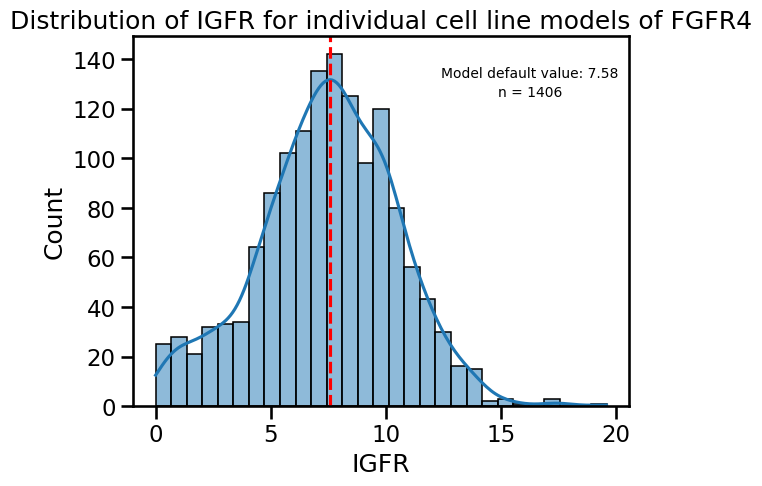

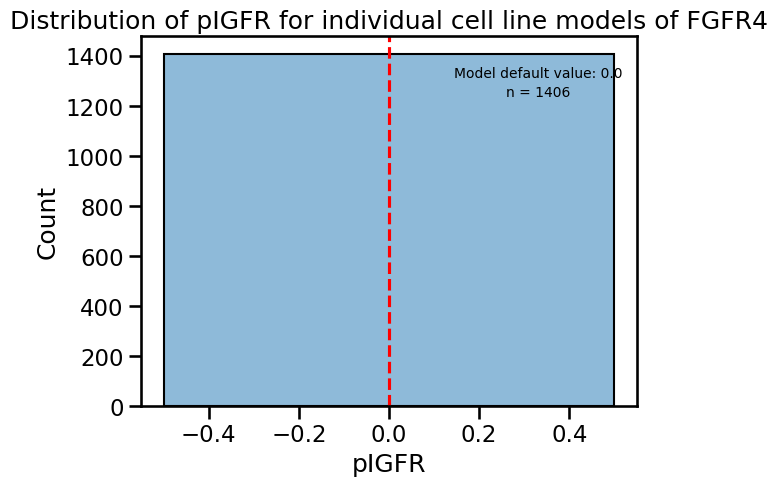

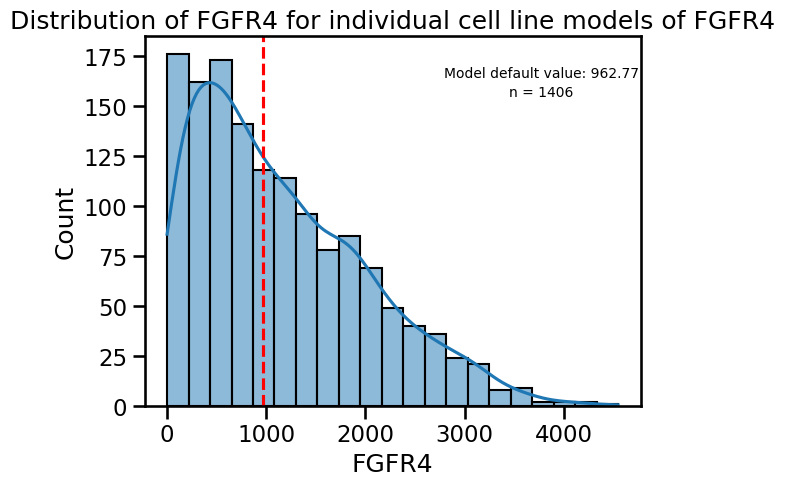

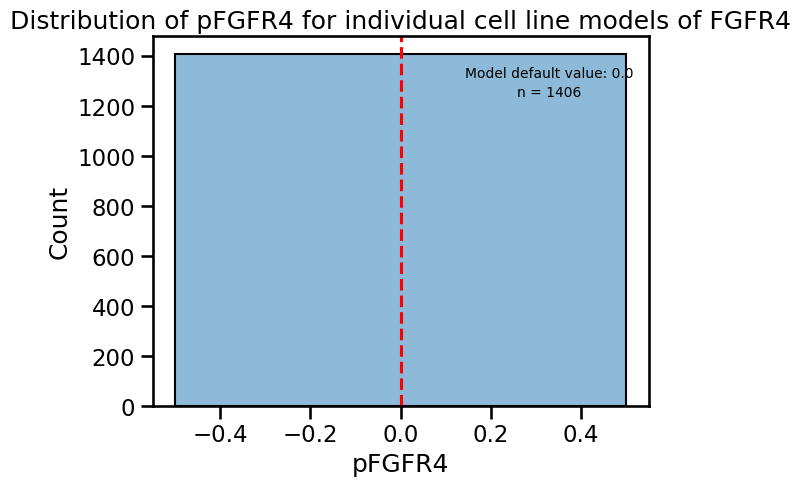

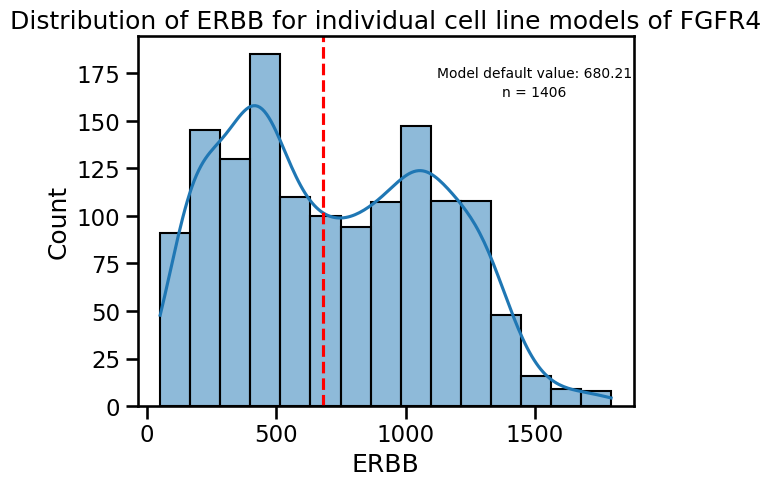

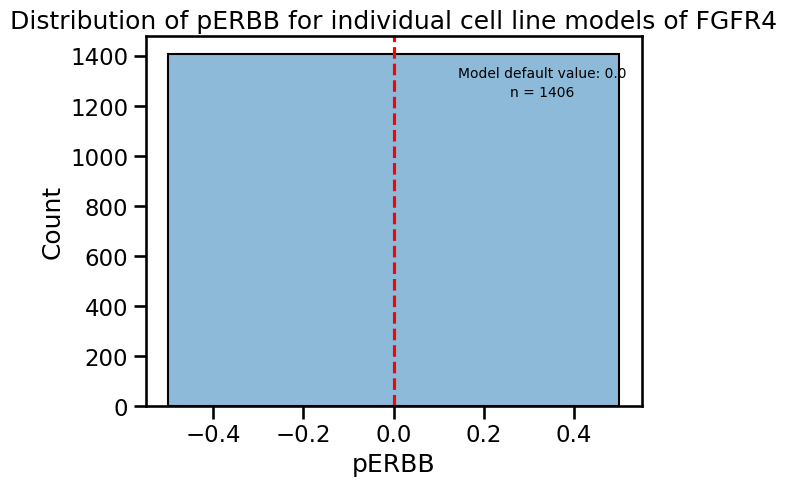

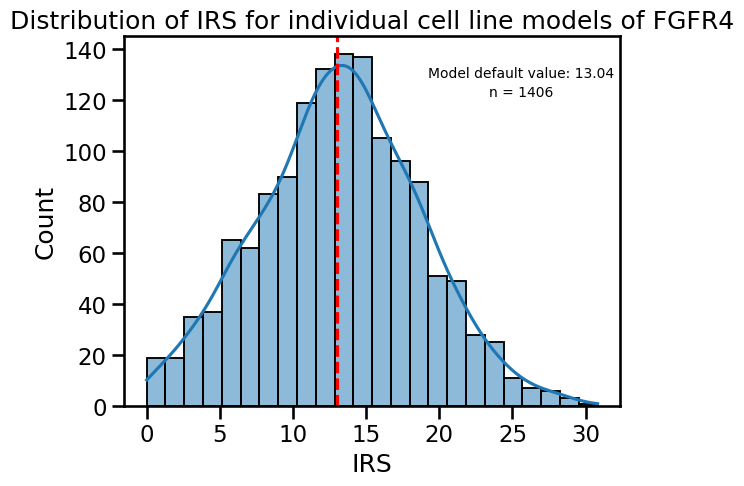

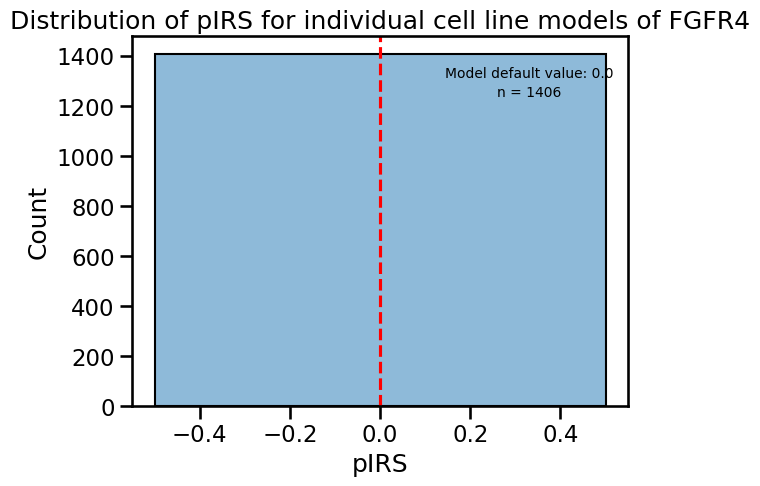

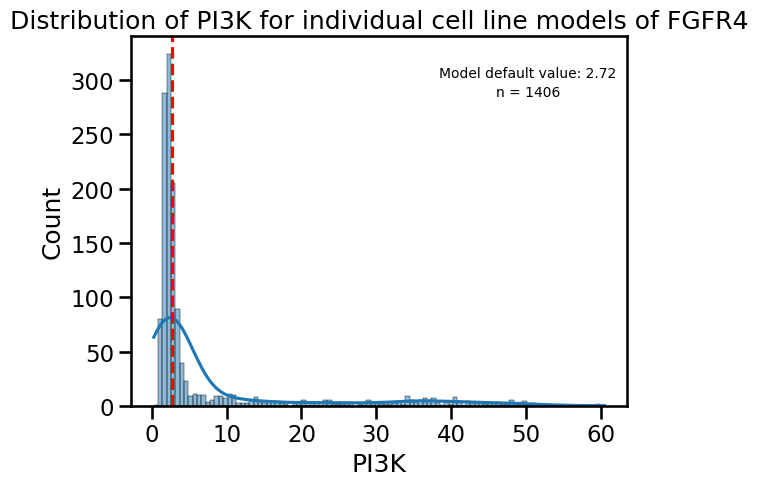

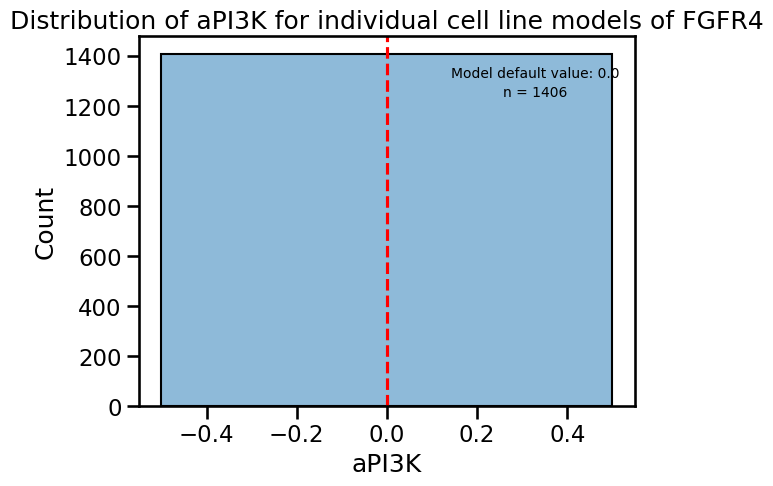

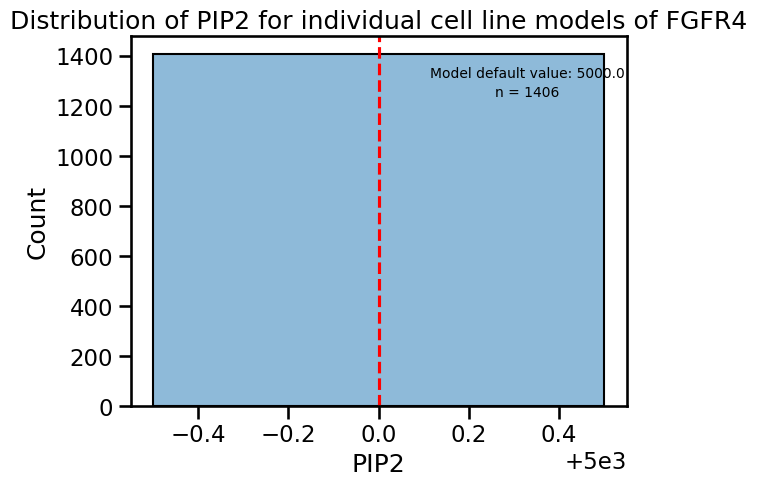

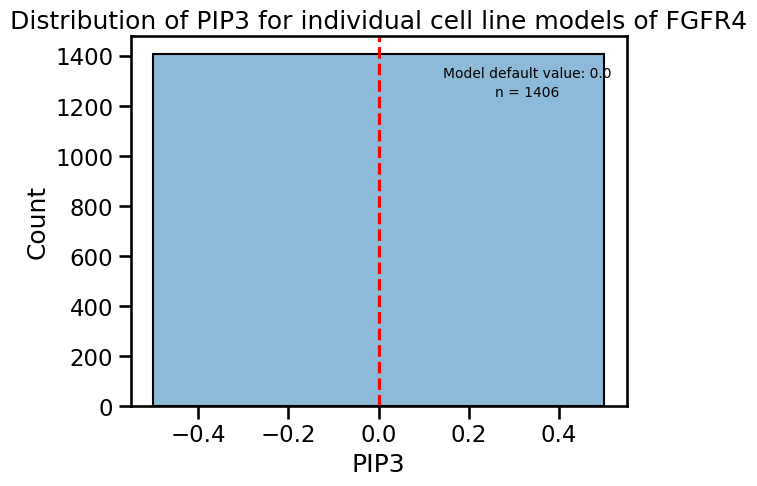

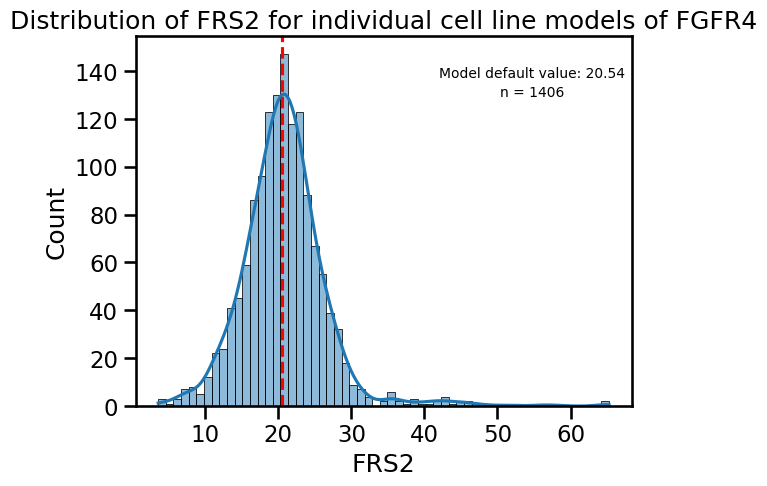

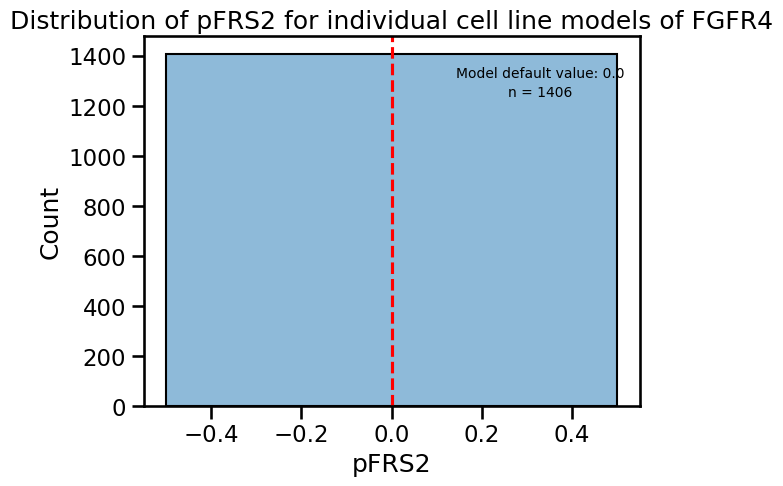

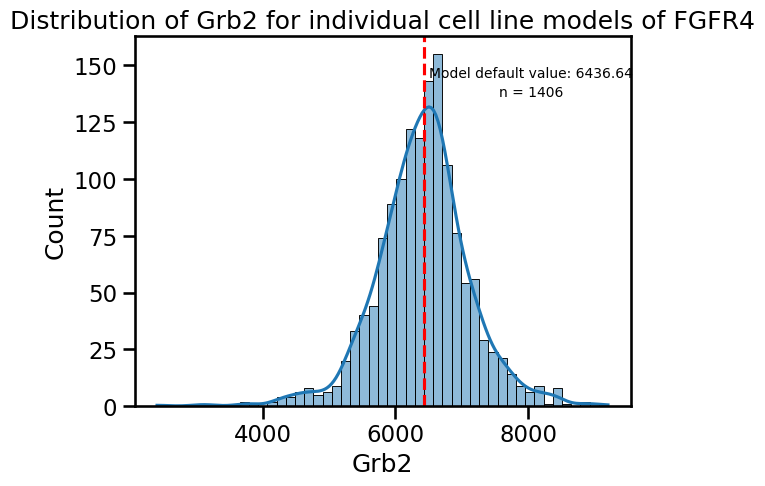

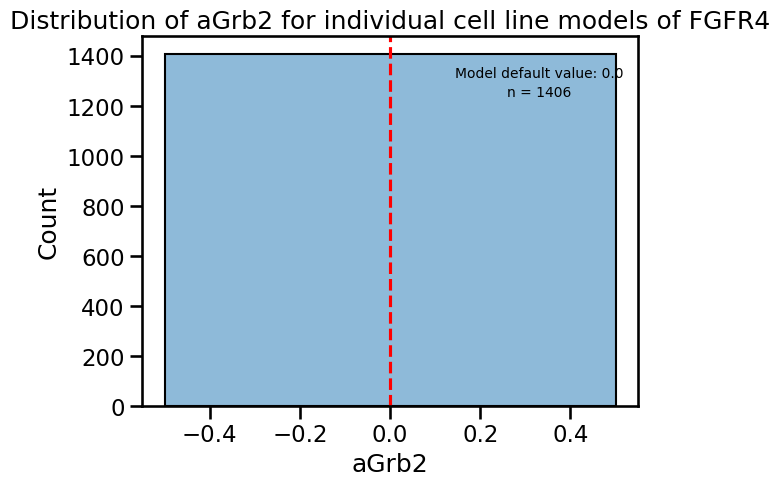

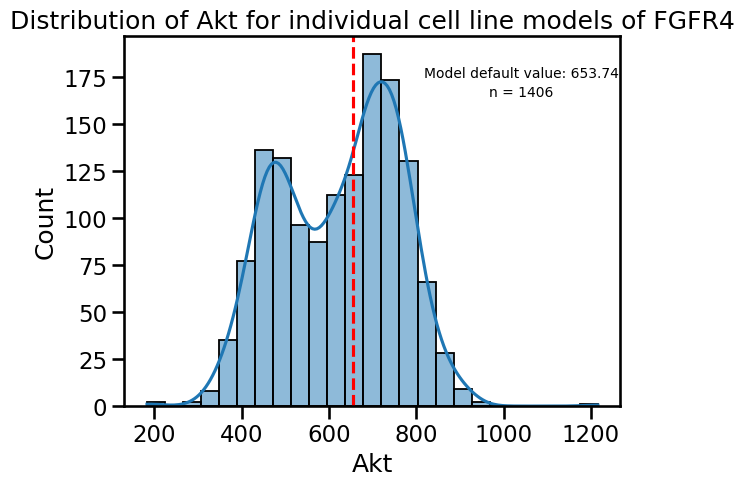

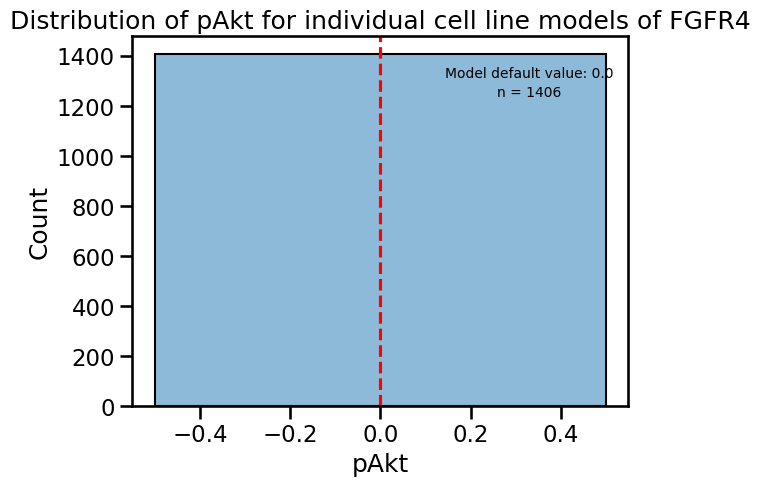

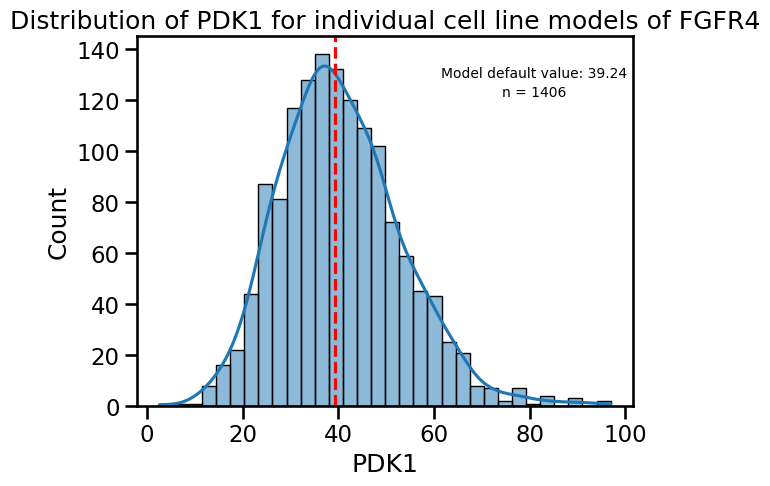

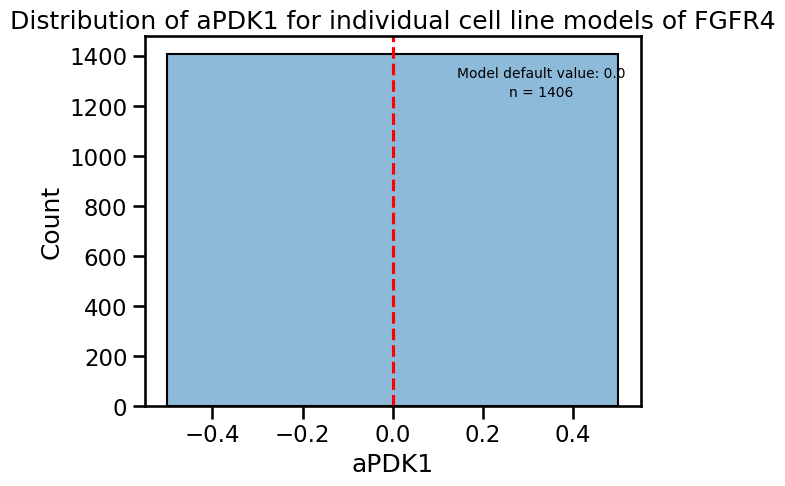

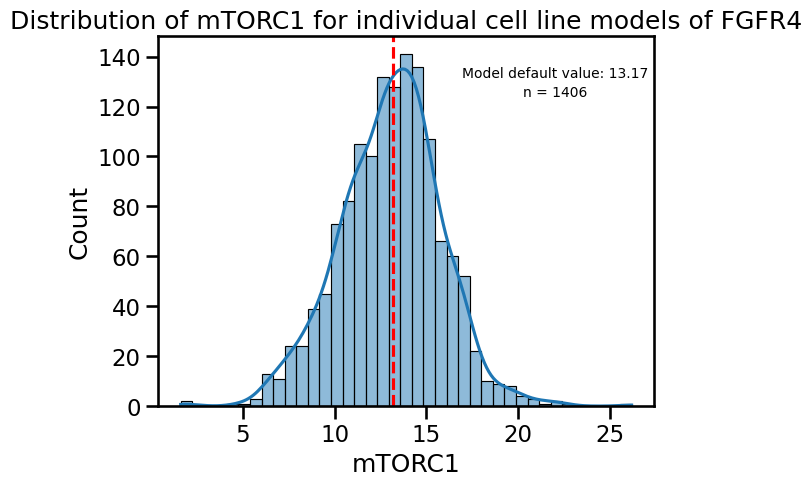

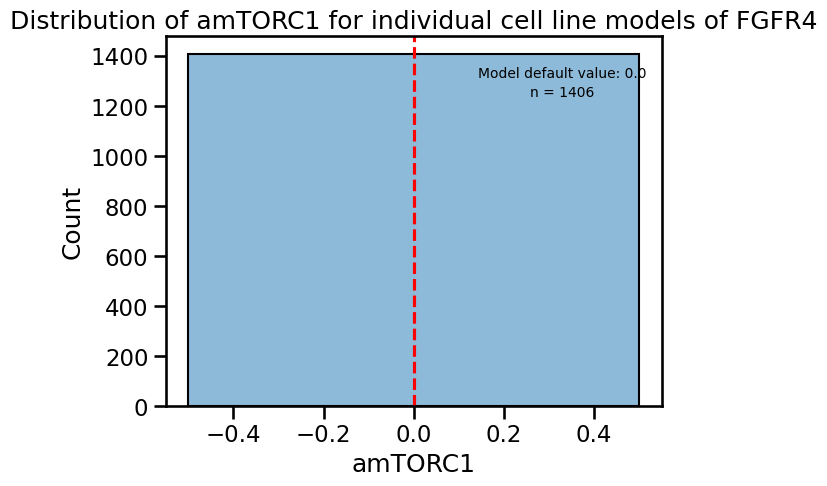

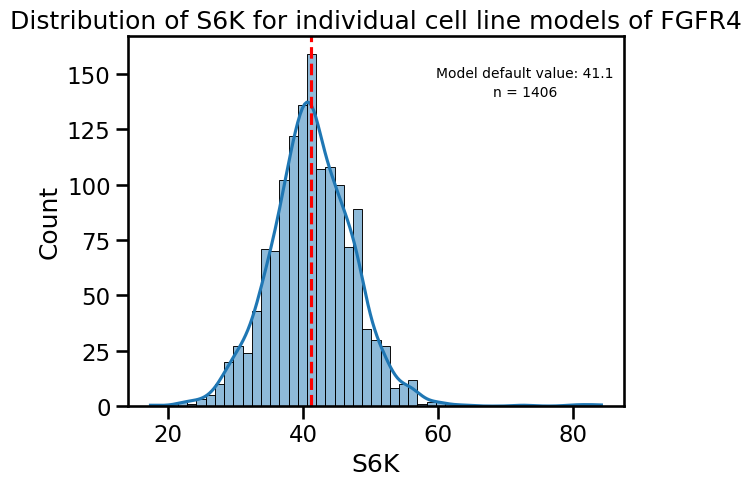

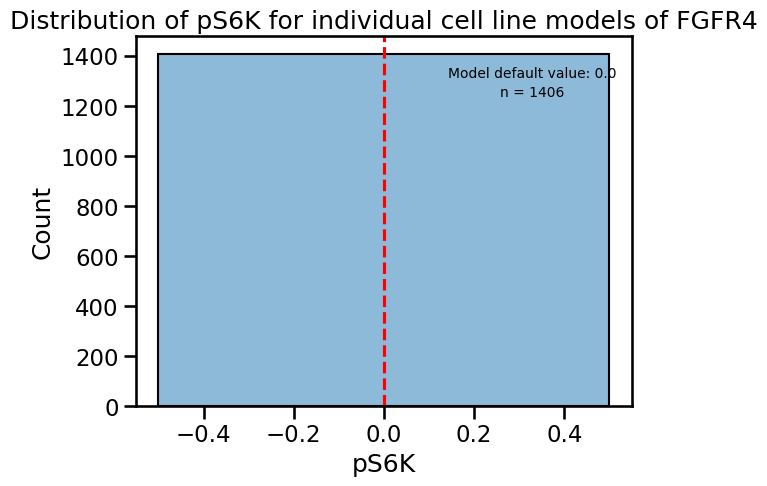

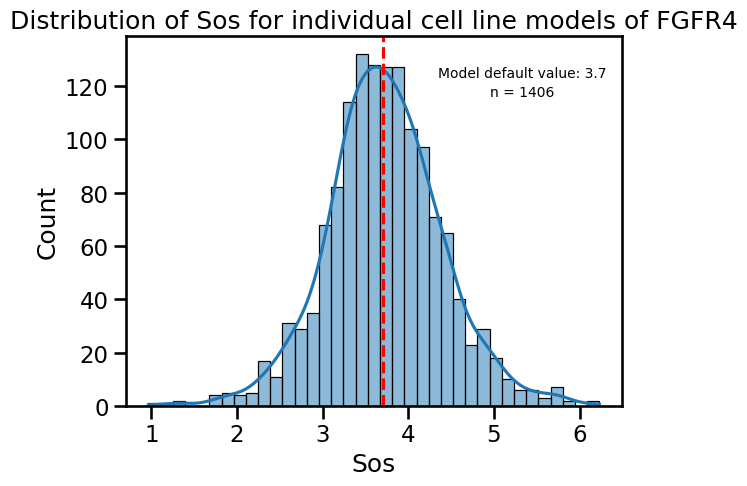

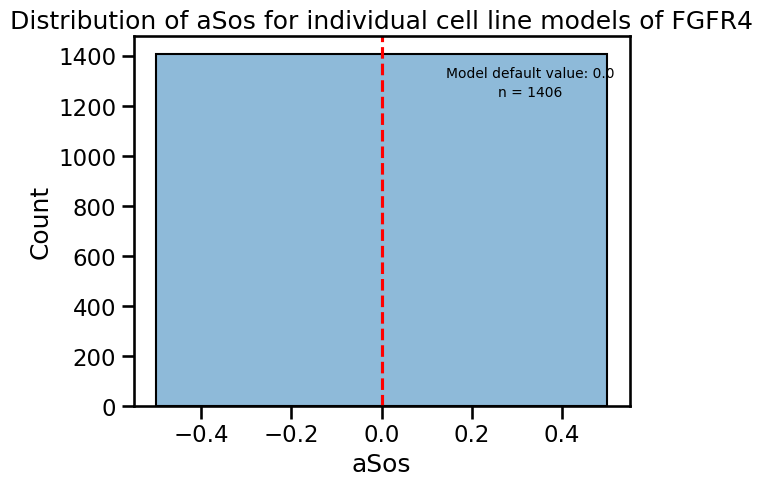

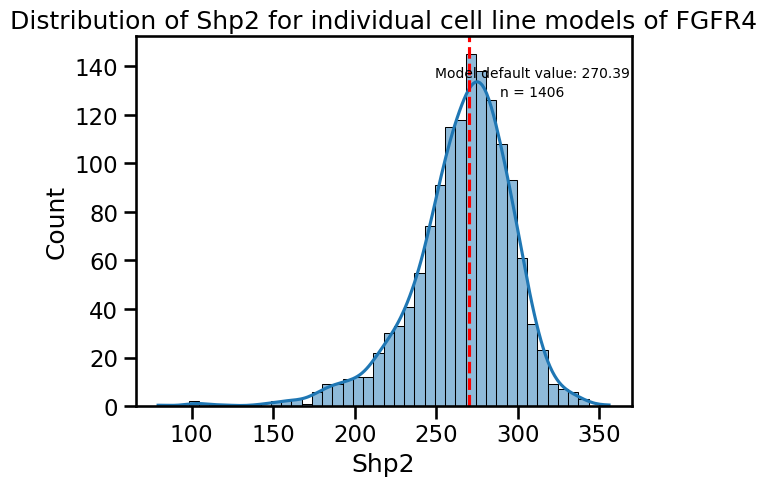

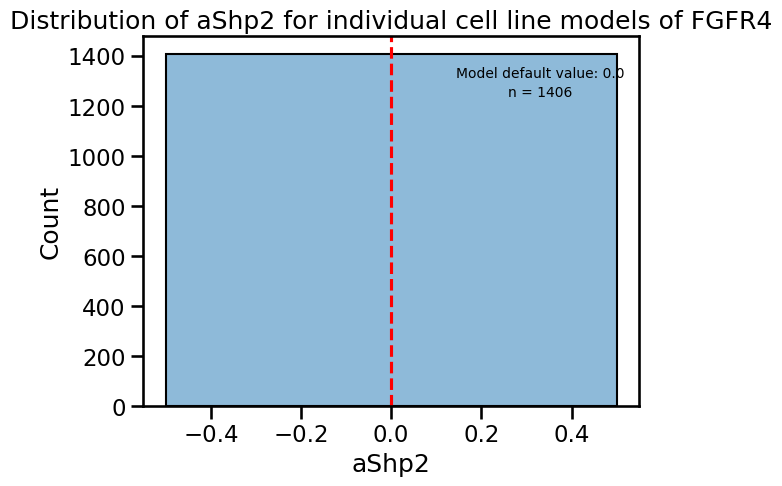

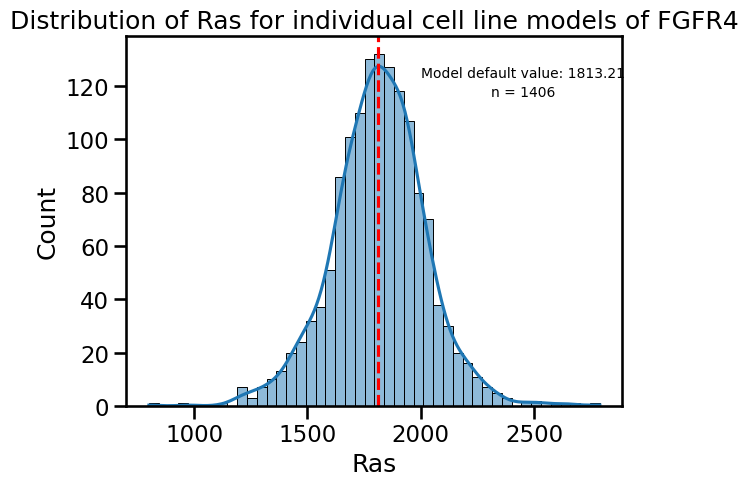

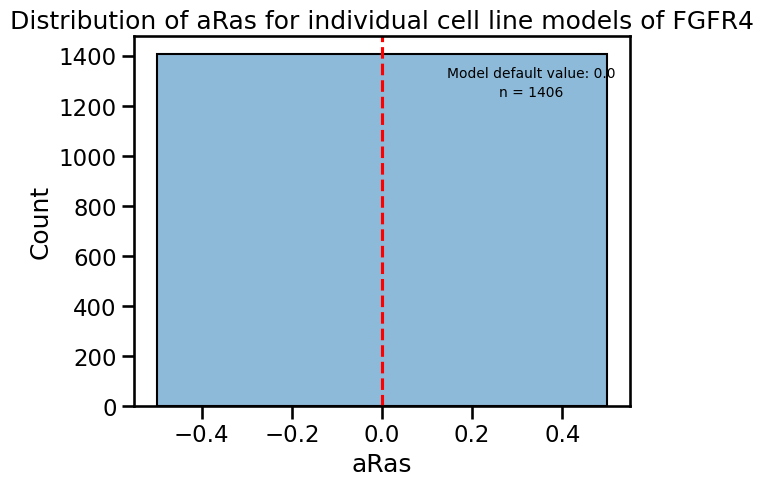

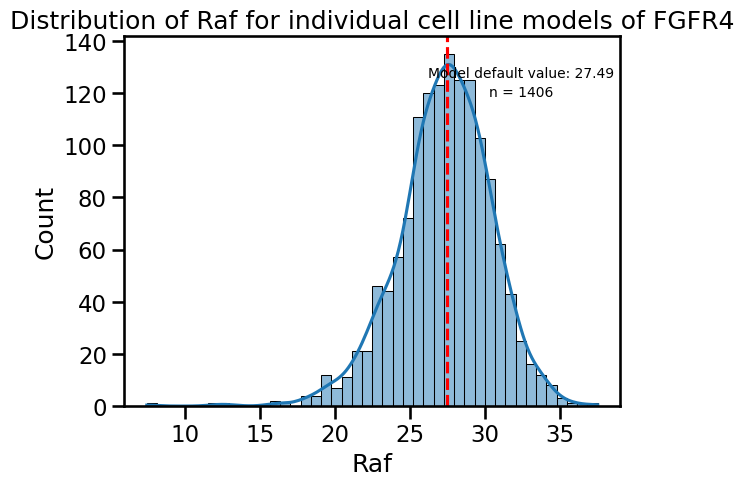

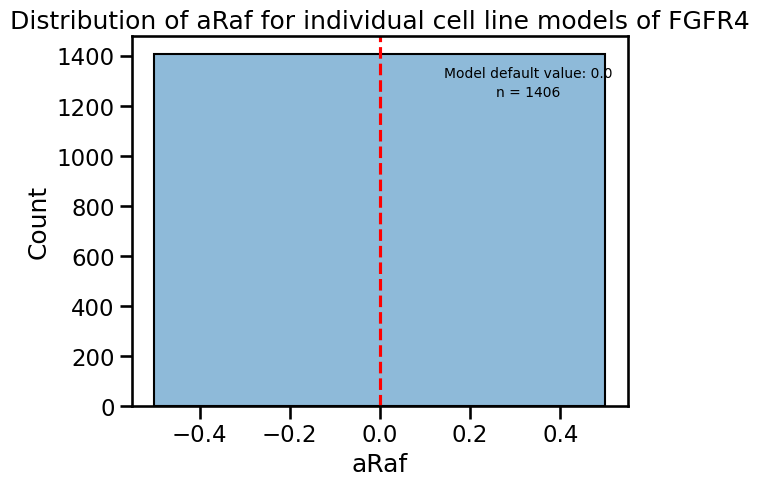

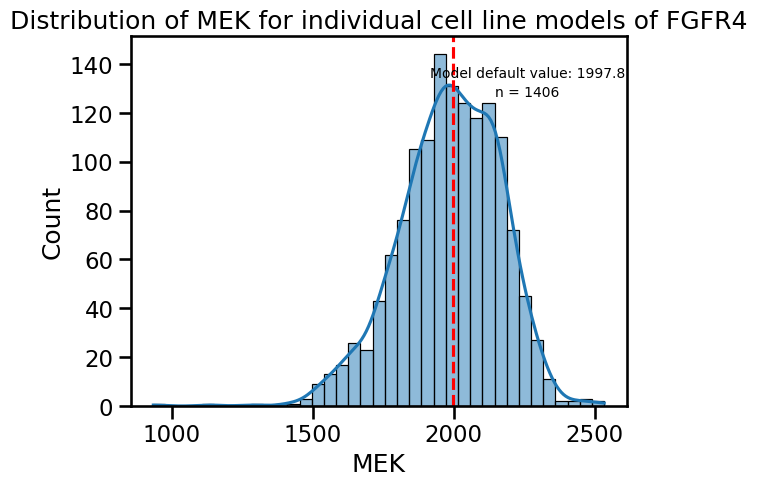

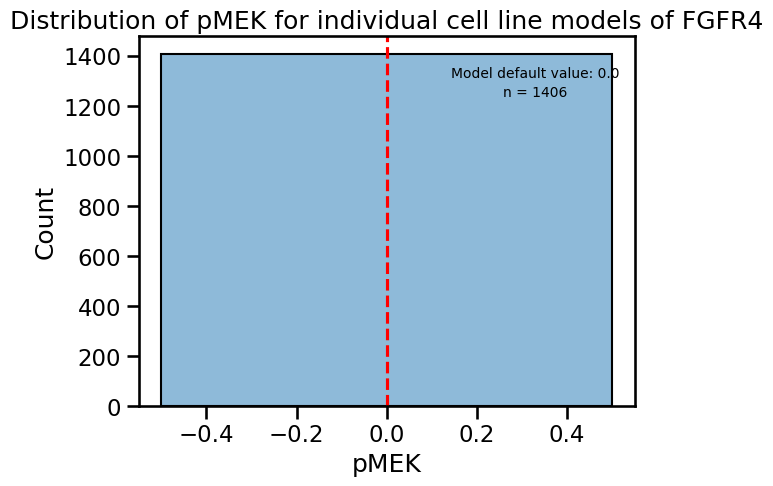

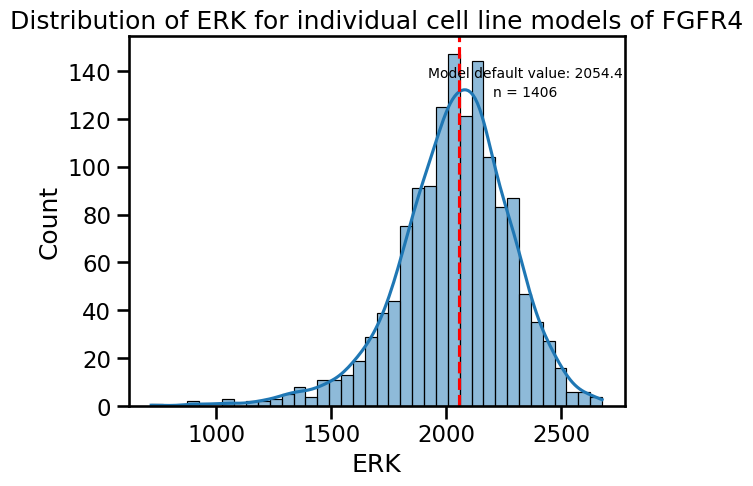

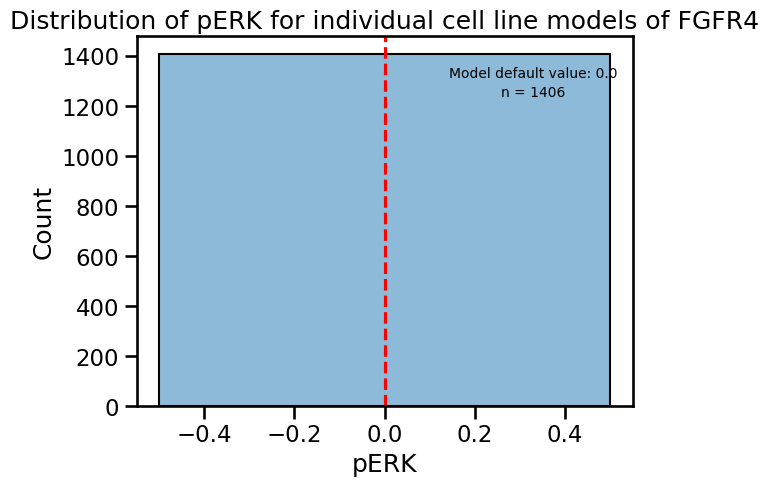

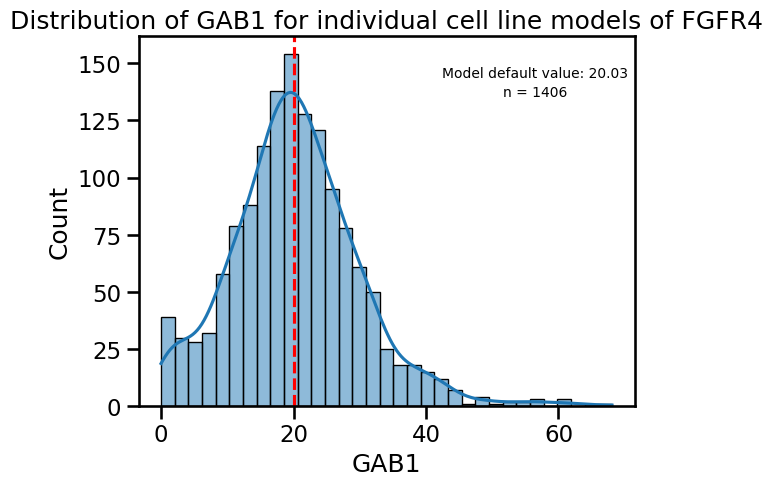

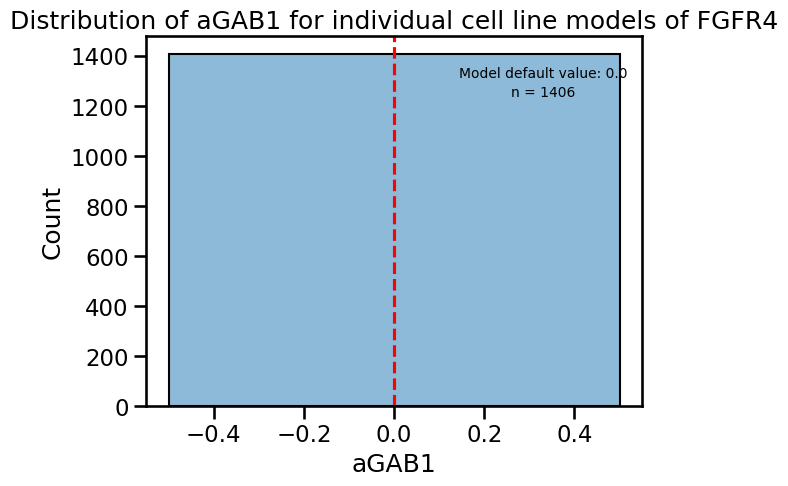

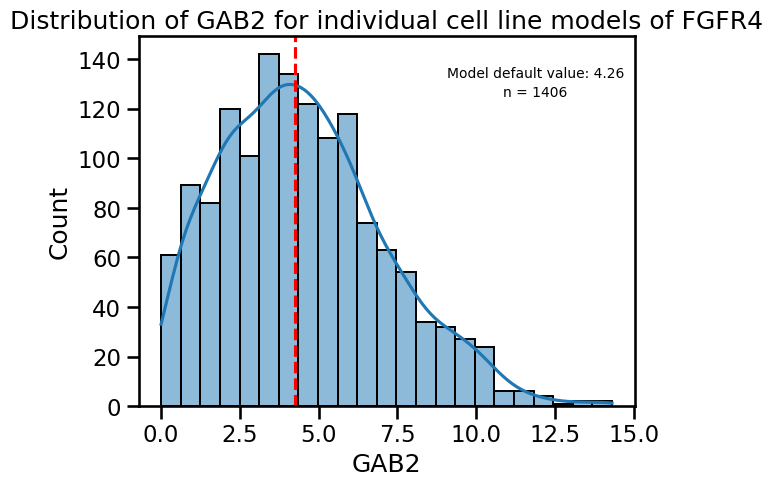

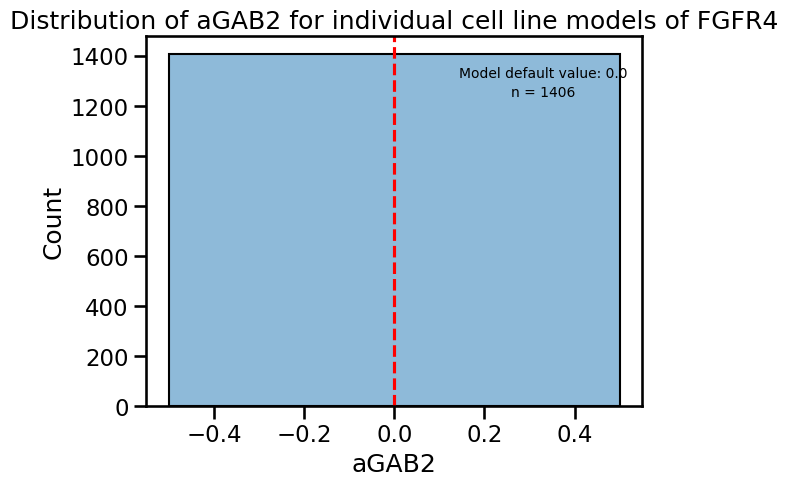

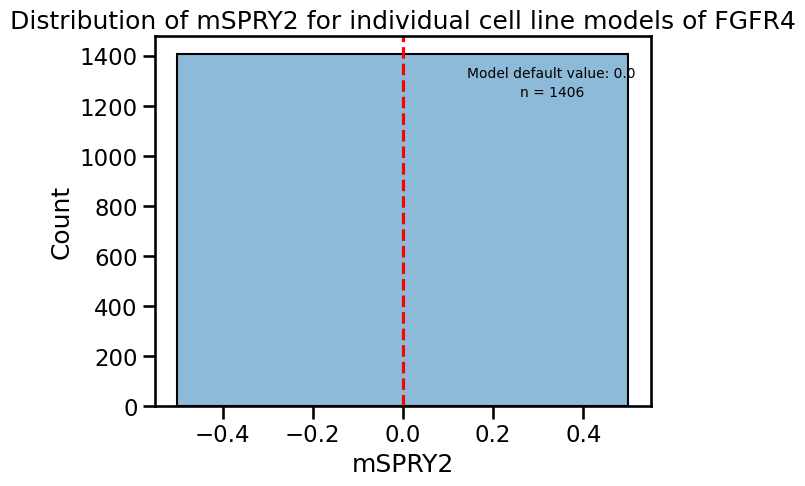

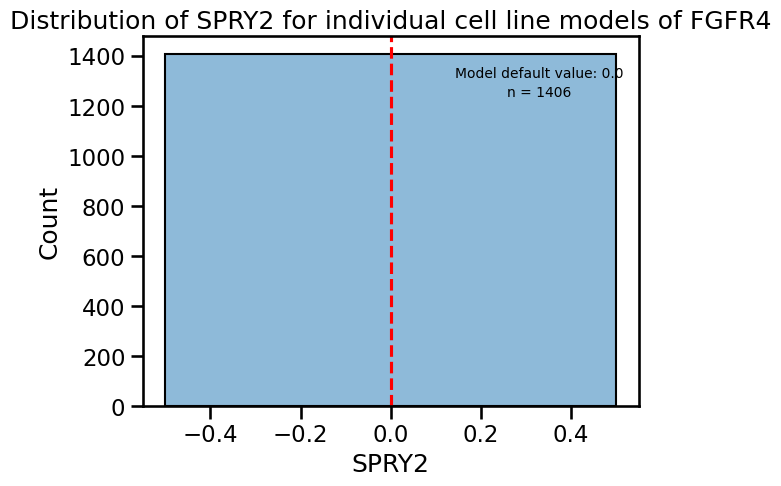

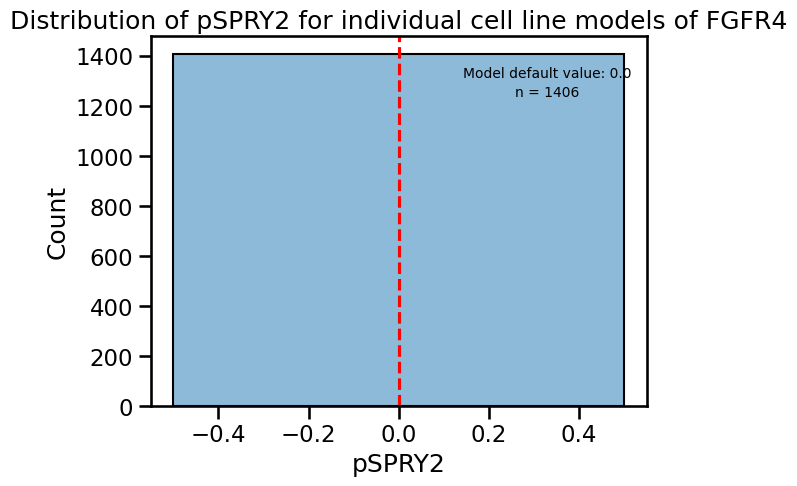

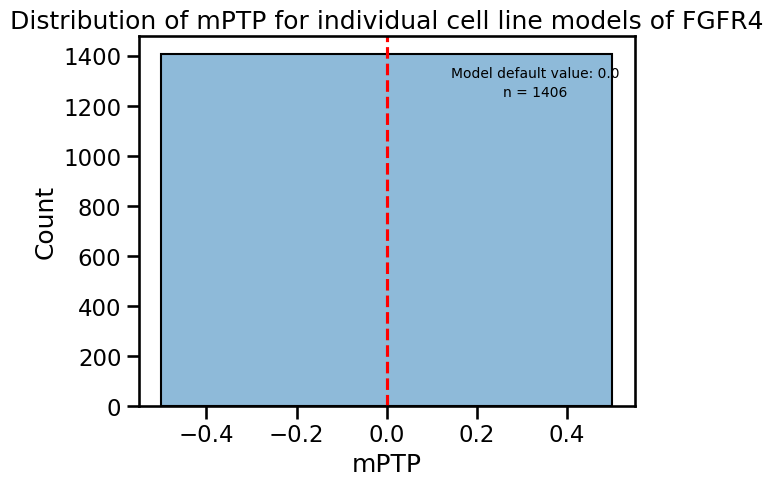

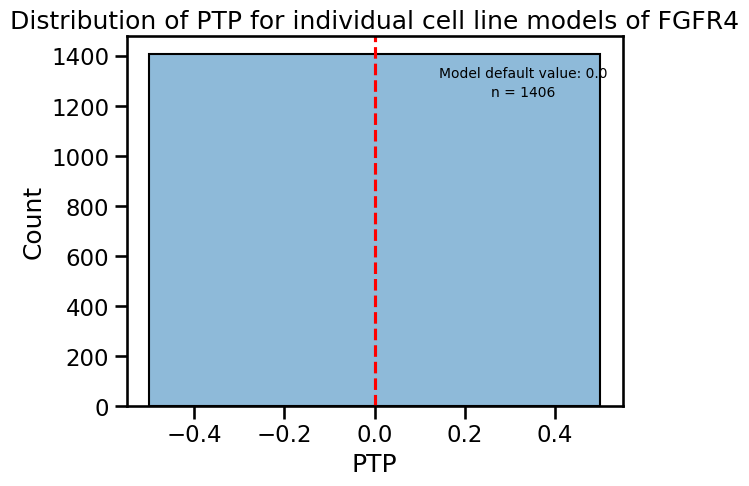

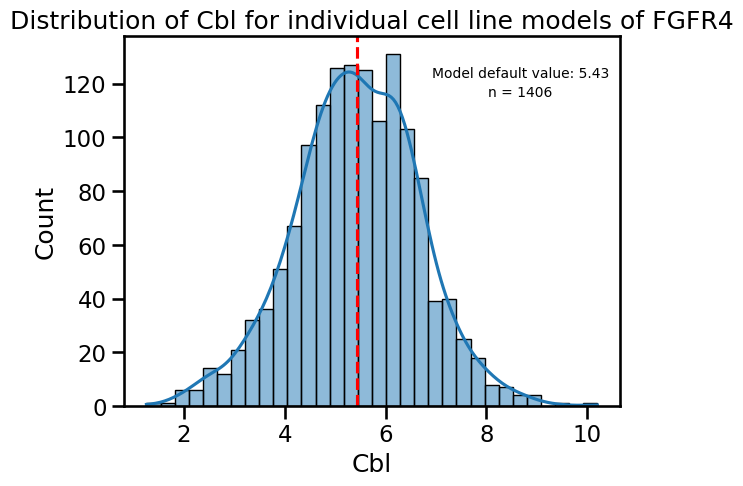

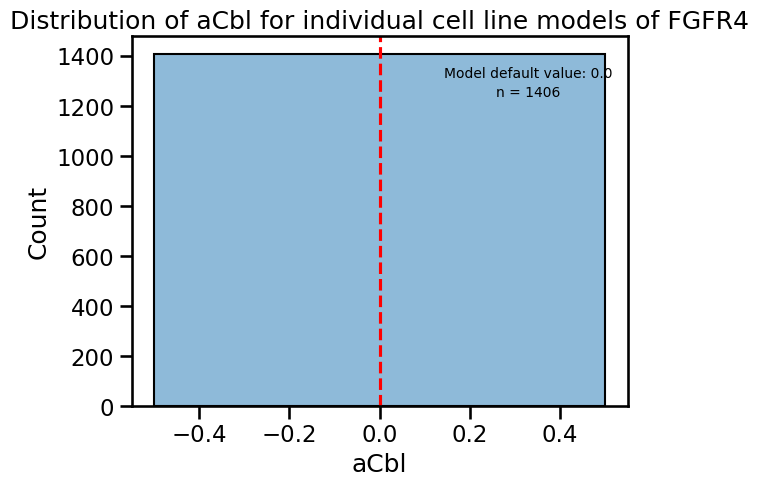

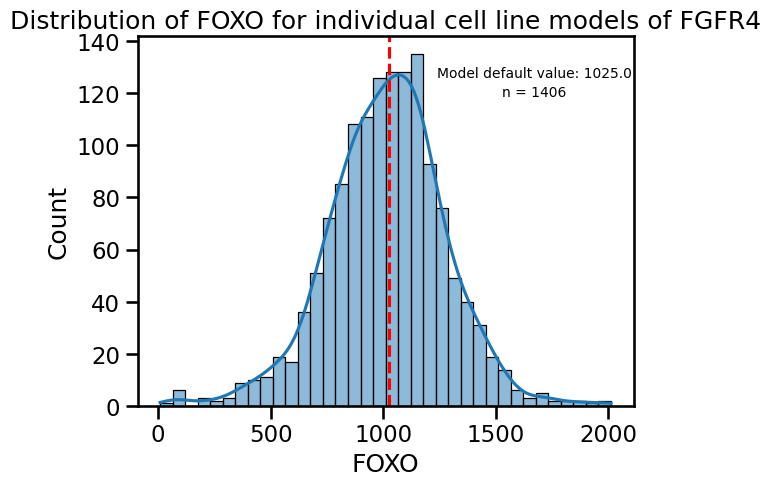

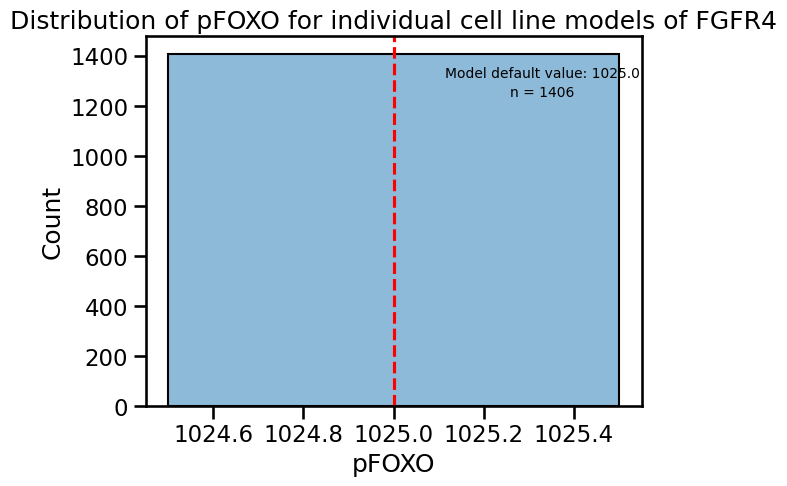

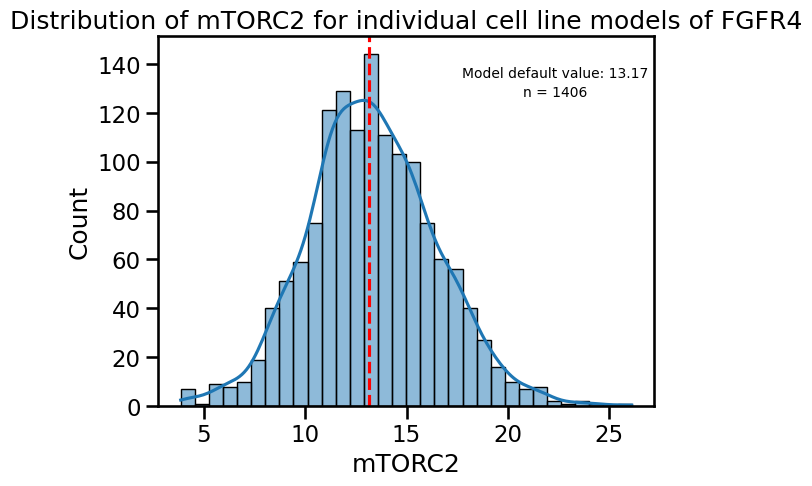

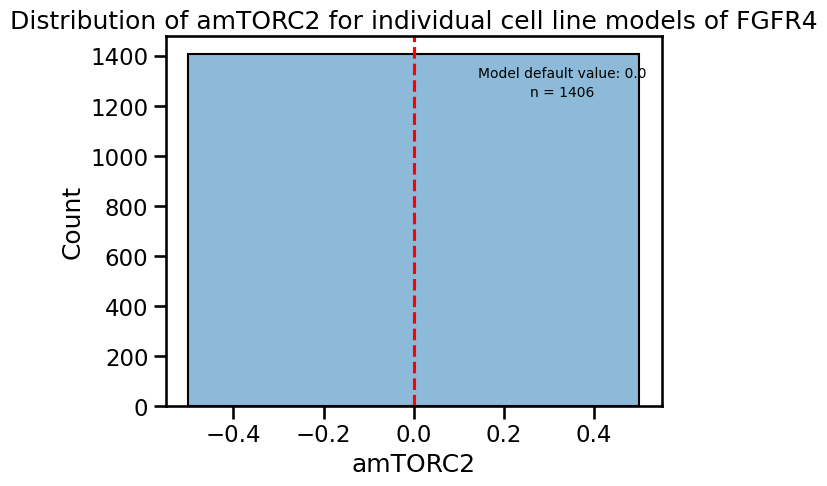

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the visualization as talk 
sns.set_context("talk")

# plot the distribution of each column in the initial conditions
n = initial_conditions.shape[0]
for col in initial_conditions.columns[1:]:
    sns.histplot(initial_conditions[col], kde=True)
    
    # add a vertical line for the model default value
    plt.axvline(match_rules_df.loc[match_rules_df['specie'] == col]['initial_value'].values[0], color='r', linestyle='--')
    
    plt.title(f'Distribution of {col} for individual cell line models of FGFR4')
    
    # add caption 
    plt.text(0.8, 0.9, f'Model default value: {match_rules_df.loc[match_rules_df["specie"] == col]["initial_value"].values[0]}', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, fontsize=10)
    plt.text(0.8, 0.85, f'n = {n}',
             horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, fontsize=10)

    # plt.show()